# AUDIO RECOGNITION 

Import all the needed libraries
- librosa -- audio processing library
- seaborn - plotting
- sklearn - ML routines

In [12]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import keras
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## MFCC Computation
The MFCC stands for Mel Frequency Cepstral Coefficients. These coefficients calculate the rate of change of the spectral bands in a given time signal. The MFCC is computed by applying a Fourier transform on the given signal and then applying the cosine transform of the logarithmic value of the Fourier spectrum. Generally speaking, the MFCC could differentiate the timbre of the given audio signal from another(11). Further, the MEL scale relates the frequency of the given signal as perceived by the user to another audio signal. The Mel scale can be used as a qualitative measure to compare two audio signals based on their MFCC score. 


`mfccsscaled = np.mean(mfcc.T,axis=0)` this normalises the mfcc scores

### Feature Extraction 

Based on trail and error , we have picked the mfcc coeff from the values 2 to 20 
`mfccsscaled[2:20]`

In [46]:
from IPython import *

def extract_mfcc(i):
    file = f"{i}.wav"
    plt.figure(figsize=(14,5))
    data,sample_rate = librosa.load(file, res_type='kaiser_fast')
    l =data.shape[0]
    n = 55000
    data = data[(l//2)-(n//2) : (l//2)+(n//2)]
    # librosa.display.waveshow(data,sr=sample_rate)
    lenVal = data.shape[0];
    
    # data = data[int(0.1*lenVal):int(0.85*lenVal)]
    # print(data.shape)
    mfcc=librosa.feature.mfcc(y=data, sr=sample_rate,  n_mfcc=60)
    mfccsscaled = np.mean(mfcc.T,axis=0)
    plt.plot(mfccsscaled[2:20],marker=".",markersize=10)
    # plt.grid()
    # print(mfccsscaled.shape)
    return mfccsscaled[2:20]
# display.Audio(file)

### Load Audio data into Array
This loads the data into a pandas dataframe which will be used to train the neural network. Add the class labels to the dataframe

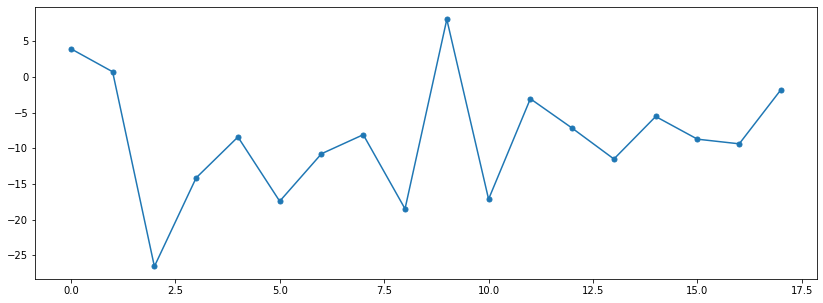

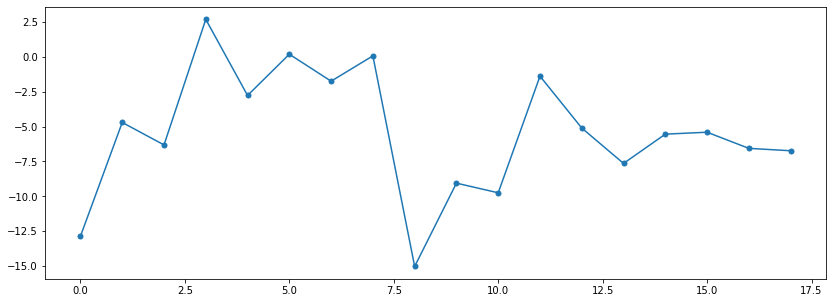

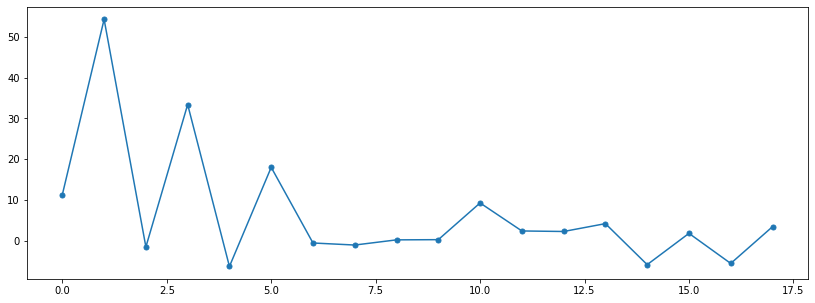

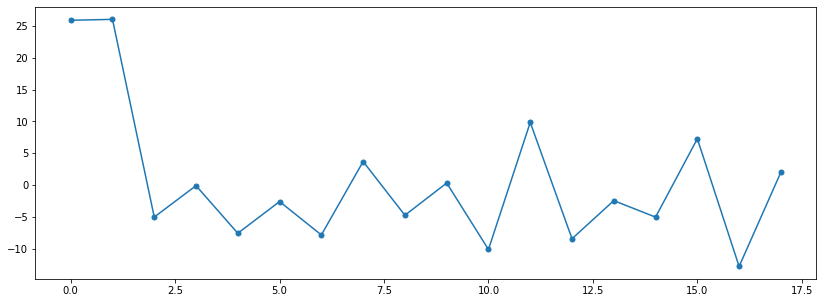

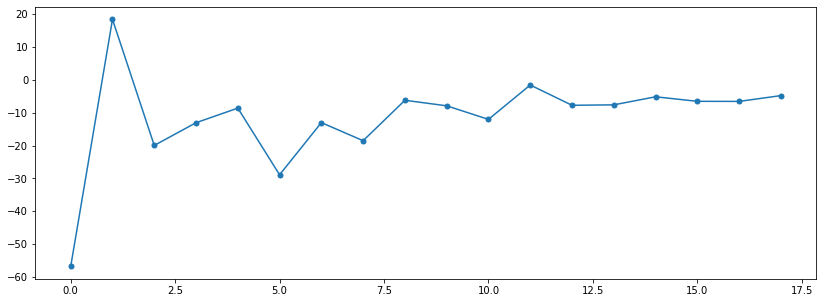

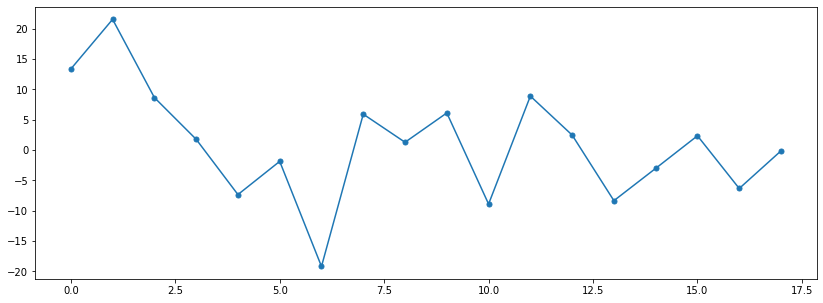

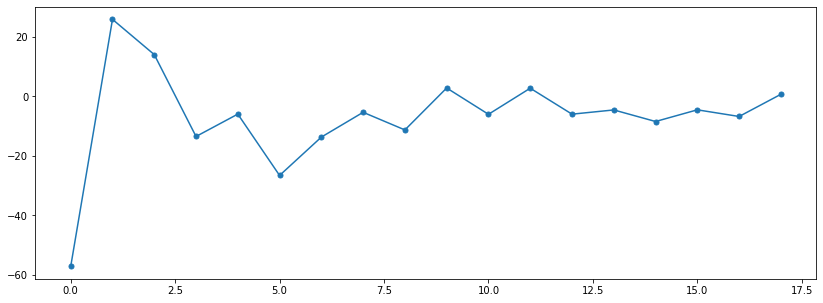

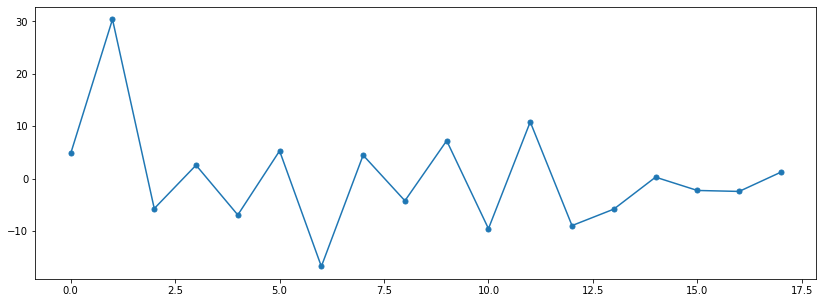

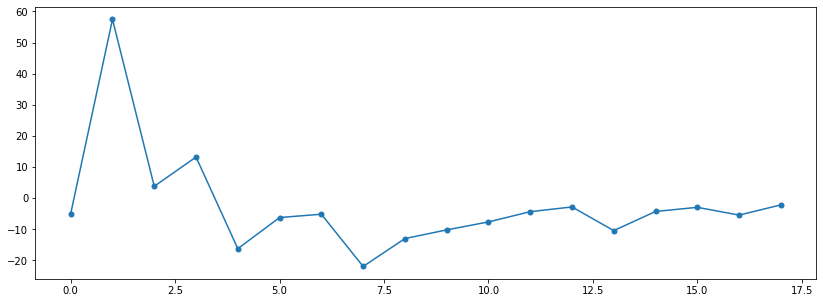

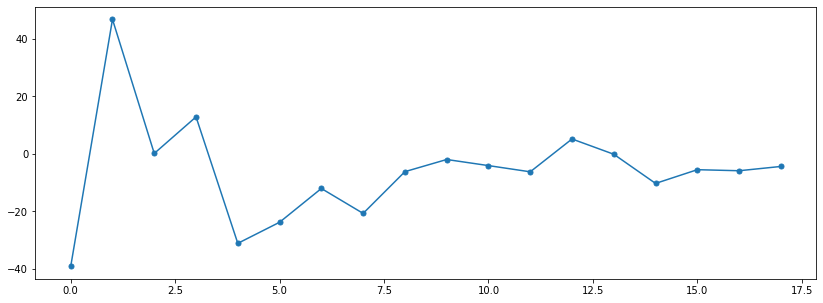

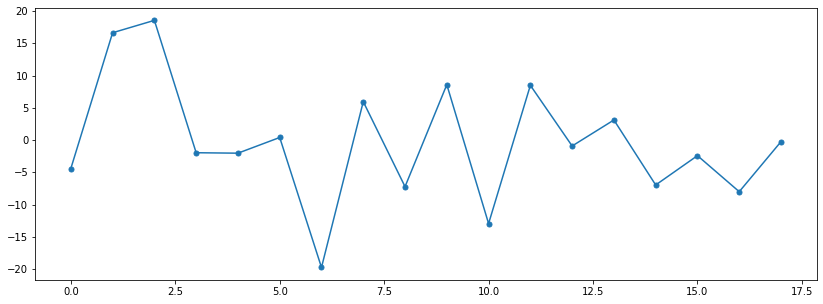

In [47]:
features = []
for i in range(1,NUM_IMAGES+1):
    data = extract_mfcc(i)
    class_label = NAMESARRAY[i-1]
    features.append([data, class_label])
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [39]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# model = LogisticRegression(max_iter=1000, multi_class='multinomial',solver="newton-cg")
# pipe = Pipeline([
#         ("scale",MinMaxScaler()),
#         ("model",model)
# ])

### Train a NN Model

Here we are using a `tensorflow` and `keras` library to generate a neural network.

- Get the Input features and save them in an array
- Encode the output column using label enoder ( from sklearn )


### Model
```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense (Dense)               (None, 25)                475       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 11)                176       
                                                                 
=================================================================
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
```

In [16]:
import tensorflow as tf
from keras.utils import to_categorical

## library import
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 



# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())


## dimensions of networl
num_rows = X.shape[0]
num_columns = X.shape[1]
num_channels = 1



# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))


num_labels = yy.shape[1]
filter_size = 2

model = Sequential()
model.add(Dense(25, input_shape=(num_columns,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(yy.shape[1], activation='softmax'))

# Display model architecture summary 
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,yy,epochs=148,verbose=2)

2022-08-14 20:38:35.268005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-14 20:38:35.408389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/thivin/.local/lib/python3.8/site-packages/cv2/../../lib64::/usr/local/cuda-11.7/lib64
2022-08-14 20:38:35.408415: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-08-14 20:38:35.409654: I tensorflow/core/platform

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                475       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 11)                176       
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/148
1/1 - 0s - loss: 2.0171 - accuracy: 0.0000e+00 - 494ms/epoch - 494ms/step
Epoch 2/148
1/1 - 0s - loss: 1.9270 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 3/148
1/1 - 0s - loss: 1.8409 - accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 4/148
1/1 - 0s - loss: 1.7590 - accuracy: 0.0000e+00 - 3ms/epo

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                475       
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 11)                176       
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


### HElper function -- PRedict the audio 

This function uses the trainned NN to predict the audio.

- Extract the MFCC coeff of input audio
- Extract relevent features
- pass it to NN for prediction

In [17]:
def predictAudio(i):
    X = np.array(featuresdf.feature.tolist())
    y = np.array(featuresdf.class_label.tolist())
    k = model.predict(X[i].reshape(1,-1))
    kk = (k - np.min(k)) / (np.max(k) - np.min(k))
    print(np.argmax(k))
    print(f"Audio Belongs to {NAMESARRAY[np.argmax(k)]} with Match Percentage : " , kk[0][np.argmax(kk)]*100)
    return kk